## Projeto 1 DSA - Fundamentos de Linguagem Python

Análise de vendas para loja de e-commerce com NumPy, Pandas e Matplotlib

### Importando Bibliotecas

In [1]:
# Instalação do pacote watermark
!pip install -q -U watermark

In [2]:
# Importação das bibliotecas usadas no projeto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta

%matplotlib inline

In [3]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [4]:
%watermark --iversions

matplotlib: 3.10.0
numpy     : 2.1.3
seaborn   : 0.13.2
pandas    : 2.2.3



### Função para gerar dados fictícios

In [5]:
# Definindo função para criar os dados fictícios de vendas

def dados_ficticios(num_registros = 600):

    print(f"\nIniciando a criação de {num_registros} registros de vendas...")
    
    # Dicionário com produtos, categorias e preços
    produtos = {
        'Laptop Gamer': {'categoria': 'Eletrônicos', 'preco': 7500.00},
        'Mouse Vertical': {'categoria': 'Acessórios', 'preco': 250.00},
        'Teclado Mecânico': {'categoria': 'Acessórios', 'preco': 550.00},
        'Monitor Ultrawide': {'categoria': 'Eletrônicos', 'preco': 2800.00},
        'Cadeira Gamer': {'categoria': 'Móveis', 'preco': 1200.00},
        'Headset 7.1': {'categoria': 'Acessórios', 'preco': 800.00},
        'Placa de Vídeo': {'categoria': 'Hardware', 'preco': 4500.00},
        'SSD 1TB': {'categoria': 'Hardware', 'preco': 600.00}
    }

    # Lista com nome dos produtos
    lista_produtos = list(produtos.keys())

    # Dicionário com cidades e seus respectivos estados
    cidades_estados = {
        'São Paulo': 'SP', 'Rio de Janeiro': 'RJ', 'Belo Horizonte': 'MG',
        'Porto Alegre': 'RS', 'Salvador': 'BA', 'Curitiba': 'PR', 'Fortaleza': 'CE'
    }

    # Lista com nome das cidades
    lista_cidades = list(cidades_estados.keys())

    # Lista vazia para armazenar os registros de vendas
    dados_vendas = []

    # Define a data inicial dos pedidos
    data_inicial = datetime(2026, 1, 1)
    
    # Loop para gerar os registros de vendas
    for i in range(num_registros):

        # Seleciona um produto aleatório
        produto_nome = random.choice(lista_produtos)

        # Seleciona uma cidade aleatória
        cidade = random.choice(lista_cidades)

        # Gera uma quantidade de produtos vendidos entre: 1 e 7
        quantidade = np.random.randint(1, 8)

        # Calcula a data do pedido a partir da data inicial
        data_pedido = data_inicial + timedelta(days = int(i/5), hours = random.randint(0, 23))

        # Desconto de até 10% se o produto for Mouse ou Teclado

        if produto_nome in ['Mouse Vertical', 'Teclado Mecânico']:
            preco_unitario = produtos[produto_nome]['preco'] * np.random.uniform(0.9, 1.0)
        else:
            preco_unitario = produtos[produto_nome]['preco']

        # Adiciona um registro de venda à lista
        dados_vendas.append({
            'ID_Pedido': 1000 + i,
            'Data_Pedido': data_pedido,
            'Nome_Produto': produto_nome,
            'Categoria': produtos[produto_nome]['categoria'],
            'Preco_Unitario': round(preco_unitario, 2),
            'Quantidade': quantidade,
            'ID_Cliente': np.random.randint(100, 150),
            'Cidade': cidade,
            'Estado': cidades_estados[cidade]
        })
    
    # Mensagem informando que os dados foram criados
    print("Dados criados com sucesso.\n")

    # Retorna os dados no formato de DataFrame
    return pd.DataFrame(dados_vendas)

### Criar, carregar e explorar os dados

In [6]:
# Criar os dados a partir da função
df_vendas = dados_ficticios(500)


Iniciando a criação de 500 registros de vendas...
Dados criados com sucesso.



In [7]:
# Shape - Mostra a quantidade de linhas e colunas da tabela
df_vendas.shape

(500, 9)

In [8]:
# Head - Mostra as 5 primeiras linhas do DF
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
0,1000,2026-01-01 15:00:00,SSD 1TB,Hardware,600.0,1,116,São Paulo,SP
1,1001,2026-01-01 20:00:00,Headset 7.1,Acessórios,800.0,1,129,São Paulo,SP
2,1002,2026-01-01 16:00:00,SSD 1TB,Hardware,600.0,7,115,Curitiba,PR
3,1003,2026-01-01 19:00:00,SSD 1TB,Hardware,600.0,5,138,Rio de Janeiro,RJ
4,1004,2026-01-01 23:00:00,Cadeira Gamer,Móveis,1200.0,3,135,São Paulo,SP


In [9]:
# Tail - exite as 5 ultimas linhas
df_vendas.tail()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
495,1495,2026-04-10 18:00:00,Headset 7.1,Acessórios,800.0,7,133,Rio de Janeiro,RJ
496,1496,2026-04-10 00:00:00,Laptop Gamer,Eletrônicos,7500.0,2,135,Salvador,BA
497,1497,2026-04-10 00:00:00,Headset 7.1,Acessórios,800.0,5,134,Porto Alegre,RS
498,1498,2026-04-10 17:00:00,Cadeira Gamer,Móveis,1200.0,6,134,Fortaleza,CE
499,1499,2026-04-10 11:00:00,Placa de Vídeo,Hardware,4500.0,1,107,Rio de Janeiro,RJ


In [10]:
# Info - motra as informações gerais sobre o DataFrame, como tipos de dados, valores não nulos
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       500 non-null    int64         
 1   Data_Pedido     500 non-null    datetime64[ns]
 2   Nome_Produto    500 non-null    object        
 3   Categoria       500 non-null    object        
 4   Preco_Unitario  500 non-null    float64       
 5   Quantidade      500 non-null    int64         
 6   ID_Cliente      500 non-null    int64         
 7   Cidade          500 non-null    object        
 8   Estado          500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 35.3+ KB


In [11]:
# Describe mostra o resumo estatístico
df_vendas.describe()

,ID_Pedido,Data_Pedido,Preco_Unitario,Quantidade,ID_Cliente
count,500.000000,500,500.000000,500.000000,500.000000
mean,1249.500000,2026-02-19 23:31:26.400000,2197.206100,3.946000,124.156000
min,1000.000000,2026-01-01 15:00:00,225.670000,1.000000,100.000000
25%,1124.750000,2026-01-26 00:00:00,600.000000,2.000000,112.750000
50%,1249.500000,2026-02-20 03:00:00,800.000000,4.000000,124.000000
75%,1374.250000,2026-03-16 22:45:00,2800.000000,6.000000,136.000000
max,1499.000000,2026-04-10 18:00:00,7500.000000,7.000000,149.000000
std,144.481833,NaN,2348.127619,1.993749,14.417329


In [12]:
# dtypes mostra os tipos de dados
df_vendas.dtypes

ID_Pedido                  int64
Data_Pedido       datetime64[ns]
Nome_Produto              object
Categoria                 object
Preco_Unitario           float64
Quantidade                 int64
ID_Cliente                 int64
Cidade                    object
Estado                    object
dtype: object

### Limpeza e Pré-processamento dos Dados

In [13]:
# Fazer a conversão da coluna 'Data_Pedido' para o tipo datetime se necessário
df_vendas['Data_Pedido'] = pd.to_datetime(df_vendas['Data_Pedido'])

In [14]:
# Criando a coluna 'Faturamento' (preço x quantidade)
df_vendas['Faturamento'] = df_vendas['Preco_Unitario'] * df_vendas['Quantidade']

In [15]:
# Usando uma função lambda para criar uma coluna de status de entrega
df_vendas['Status_Entrega'] = df_vendas['Estado'].apply(lambda estado: 'Rápida' if estado in ['SP', 'RJ', 'MG'] else 'Normal')

In [16]:
# Exibe informações gerais sobre o DataFrame (tipos de dados, valores não nulos)
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       500 non-null    int64         
 1   Data_Pedido     500 non-null    datetime64[ns]
 2   Nome_Produto    500 non-null    object        
 3   Categoria       500 non-null    object        
 4   Preco_Unitario  500 non-null    float64       
 5   Quantidade      500 non-null    int64         
 6   ID_Cliente      500 non-null    int64         
 7   Cidade          500 non-null    object        
 8   Estado          500 non-null    object        
 9   Faturamento     500 non-null    float64       
 10  Status_Entrega  500 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 43.1+ KB


In [17]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_Entrega
0,1000,2026-01-01 15:00:00,SSD 1TB,Hardware,600.0,1,116,São Paulo,SP,600.0,Rápida
1,1001,2026-01-01 20:00:00,Headset 7.1,Acessórios,800.0,1,129,São Paulo,SP,800.0,Rápida
2,1002,2026-01-01 16:00:00,SSD 1TB,Hardware,600.0,7,115,Curitiba,PR,4200.0,Normal
3,1003,2026-01-01 19:00:00,SSD 1TB,Hardware,600.0,5,138,Rio de Janeiro,RJ,3000.0,Rápida
4,1004,2026-01-01 23:00:00,Cadeira Gamer,Móveis,1200.0,3,135,São Paulo,SP,3600.0,Rápida


### Análise 1 - Produtos mais vendidos

In [18]:
# Para encontrar os mais vendidos, podemos agrupar os dados por 'Nome_Produto' e somar as quantidades vendidas. Em seguida, ordenamos os resultados em ordem decrescente para identificar os produtos mais vendidos.
top_10_produtos = df_vendas.groupby('Nome_Produto')['Quantidade'].sum().sort_values(ascending = False).head(10)
top_10_produtos

Nome_Produto
Headset 7.1          278
SSD 1TB              272
Laptop Gamer         257
Monitor Ultrawide    251
Mouse Vertical       238
Placa de Vídeo       227
Teclado Mecânico     227
Cadeira Gamer        223
Name: Quantidade, dtype: int64

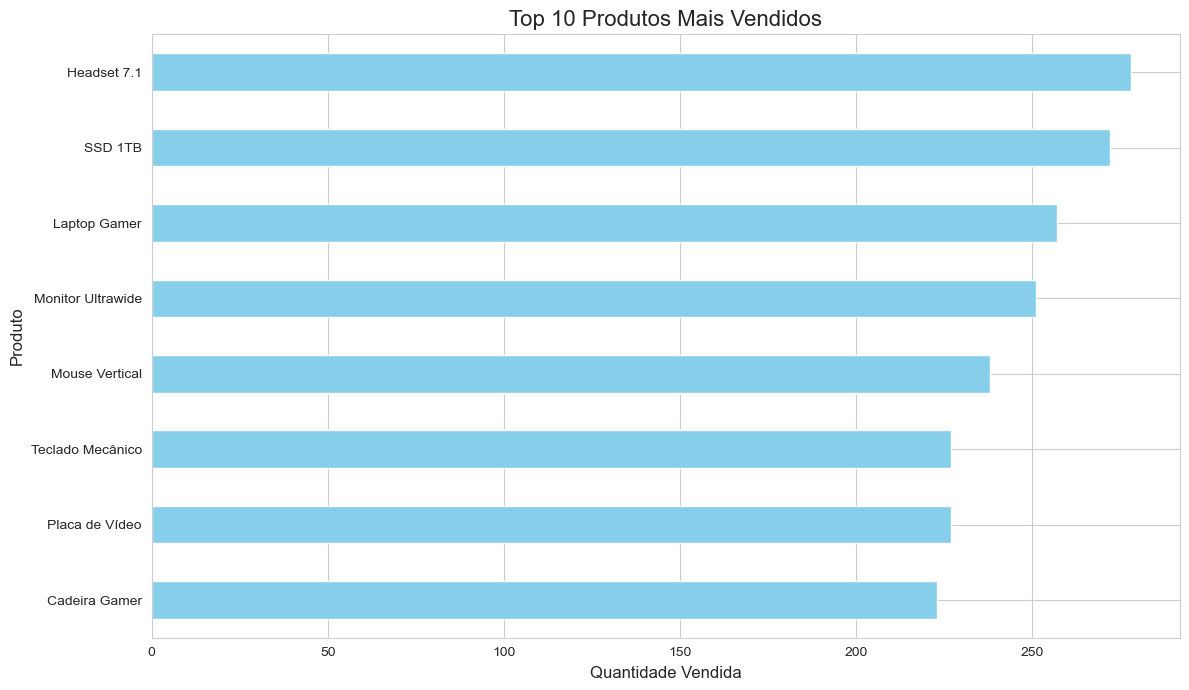

In [19]:
# Criando um gráfico de barras para visualizar os produtos mais vendidos
sns.set_style("whitegrid")

plt.figure(figsize = (12, 7))

top_10_produtos.sort_values(ascending = True).plot(kind = 'barh', color = 'skyblue')

plt.title('Top 10 Produtos Mais Vendidos', fontsize = 16)
plt.xlabel('Quantidade Vendida', fontsize = 12)
plt.ylabel('Produto', fontsize = 12)

plt.tight_layout()
plt.show()

### Análise 2 - Faturamento Mensal

In [20]:
# Criar uma coluna 'Mes' para fazer o agrupamento mensal
df_vendas['Mes'] = df_vendas['Data_Pedido'].dt.to_period('M')

In [21]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_Entrega,Mes
0,1000,2026-01-01 15:00:00,SSD 1TB,Hardware,600.0,1,116,São Paulo,SP,600.0,Rápida,2026-01
1,1001,2026-01-01 20:00:00,Headset 7.1,Acessórios,800.0,1,129,São Paulo,SP,800.0,Rápida,2026-01
2,1002,2026-01-01 16:00:00,SSD 1TB,Hardware,600.0,7,115,Curitiba,PR,4200.0,Normal,2026-01
3,1003,2026-01-01 19:00:00,SSD 1TB,Hardware,600.0,5,138,Rio de Janeiro,RJ,3000.0,Rápida,2026-01
4,1004,2026-01-01 23:00:00,Cadeira Gamer,Móveis,1200.0,3,135,São Paulo,SP,3600.0,Rápida,2026-01


In [22]:
# Agrupa por mês e soma o faturamento
faturamento_mensal = df_vendas.groupby('Mes')['Faturamento'].sum()

In [23]:
# Converte o índice para string para facilitar a plotagem no gráfico
faturamento_mensal.index = faturamento_mensal.index.strftime('%Y-%m')

In [24]:
# Formata para duas casas decimais
faturamento_mensal.map('R$ {:,.2f}'.format)

Mes
2026-01    R$ 1,461,190.83
2026-02    R$ 1,261,476.72
2026-03    R$ 1,388,549.16
2026-04      R$ 368,514.24
Name: Faturamento, dtype: object

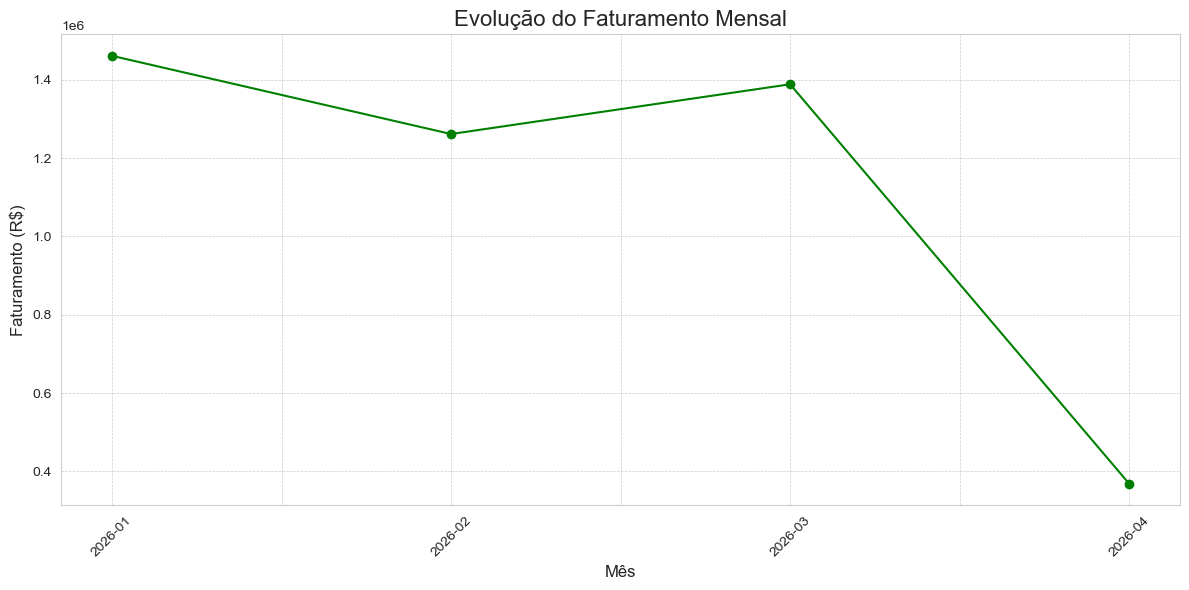

In [25]:
# Criando um gráfico de linhas para visualizar o faturamento mensal
plt.figure(figsize = (12, 6))

faturamento_mensal.plot(kind = 'line', marker = 'o', linestyle = '-', color = 'green')

plt.title('Evolução do Faturamento Mensal', fontsize = 16)
plt.xlabel('Mês', fontsize = 12)
plt.ylabel('Faturamento (R$)', fontsize = 12)

# Rotaciona os valores do eixo X em 45 graus para melhor visualização
plt.xticks(rotation = 45)
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

plt.tight_layout()
plt.show()

### Análise 3 - Vendas Por Estado

In [26]:
# Agrupa por estado e soma o faturamento
vendas_estado = df_vendas.groupby('Estado')['Faturamento'].sum().sort_values(ascending = False)

In [27]:
# Formata os valores em duas casas decimais
vendas_estado.map('R$ {:,.2f}'.format)

Estado
PR    R$ 847,536.78
SP    R$ 718,853.60
RJ    R$ 718,386.37
BA    R$ 660,891.85
MG    R$ 597,050.08
CE    R$ 516,874.66
RS    R$ 420,137.61
Name: Faturamento, dtype: object

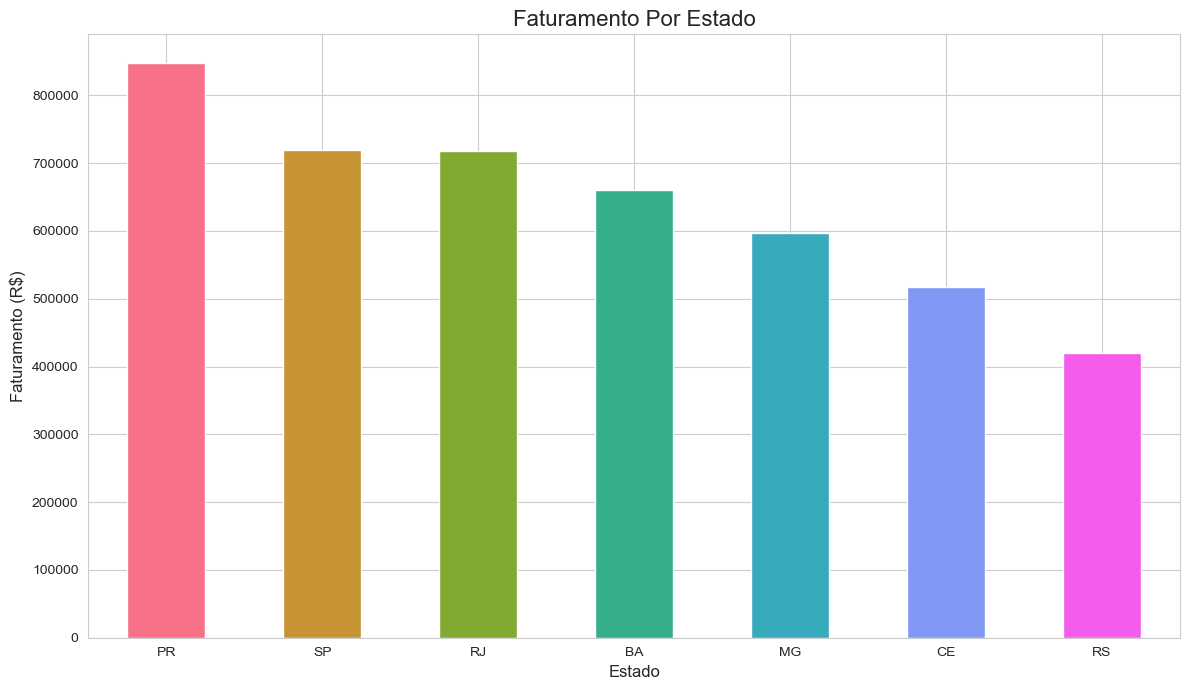

In [28]:
# Criando um gráfico de barras para visualizar as vendas por Estado
plt.figure(figsize = (12, 7))

vendas_estado.plot(kind = 'bar', color = sns.color_palette("husl", 7))

plt.title('Faturamento Por Estado', fontsize = 16)
plt.xlabel('Estado', fontsize = 12)
plt.ylabel('Faturamento (R$)', fontsize = 12)

plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

### Análise 4 - Faturamento por Categoria

In [29]:
# Agrupa por categoria, soma o faturamento e formata como moeda para melhor leitura
faturamento_categoria = df_vendas.groupby('Categoria')['Faturamento'].sum().sort_values(ascending = False)

In [30]:
faturamento_categoria.map('R$ {:,.2f}'.format)

Categoria
Eletrônicos    R$ 2,630,300.00
Hardware       R$ 1,184,700.00
Acessórios       R$ 397,130.95
Móveis           R$ 267,600.00
Name: Faturamento, dtype: object

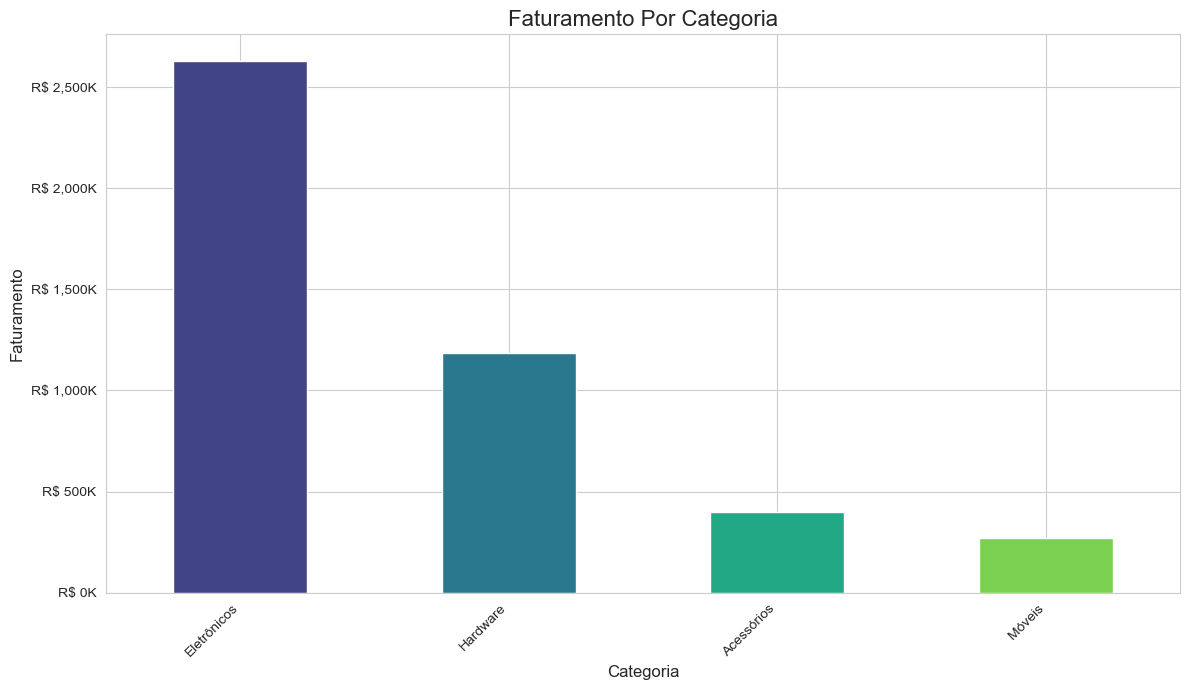

In [31]:
# Criando um gráfico de barras usando uma função para formatar os valores de milhares

from matplotlib.ticker import FuncFormatter

faturamento_ordenado = faturamento_categoria.sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (12, 7))

# Esta função recebe um valor 'y' e o transforma em uma string no formato 'R$ XX K'
def formatador_milhares(y, pos):
    """Formata o valor em milhares (K) com o cifrão R$."""
    return f'R$ {y/1000:,.0f}K'

formatter = FuncFormatter(formatador_milhares)

ax.yaxis.set_major_formatter(formatter)
faturamento_ordenado.plot(kind = 'bar', ax = ax, color = sns.color_palette("viridis", len(faturamento_ordenado)))

ax.set_title('Faturamento Por Categoria', fontsize = 16)
ax.set_xlabel('Categoria', fontsize = 12)
ax.set_ylabel('Faturamento', fontsize = 12)

plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()